In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append('/home/like/repo/simulation/build')
from lib_test_resist_cnn import *


In [14]:
s = resis_simulation() 
s.load_user_config("/home/like/repos/simulation/config/calib_193.py", True)
cutline_debug_list = []#list(range(0, 32))

associate_order = 1
laguerre_order = 2
# 原始weight
#   使用 5 个点的结果
"""
pattern-name  cutline(dbu)                               polar  design-cd(dbu)  measured-cd(dbu)  weight  post-calib-results  
-------------------------------------------------------------------------------------------------------------------------------------
L48P110       [[9245770,87078000],[9246230,87078000]]    1      192             230               1       [196.991,-8.25222]  
L48P114       [[9309791,87078000],[9310209,87078000]]    1      192             209               0.3     [198.126,-2.71839]  
L48P116       [[9341797,87078000],[9342203,87078000]]    1      192             203               0.3     [170.157,-8.21074]  
L48P118       [[9373804,87078000],[9374196,87078000]]    1      192             196               0.3     [154.329,-10.4177]  
L48P122       [[9437808,87078000],[9438192,87078000]]    1      192             187               0.3     [190.175,0.793711]  
L48P126       [[9501808,87078000],[9502192,87078000]]    1      192             177               0.3     [190.175,3.29371]   
L48P130       [[9565808,87078000],[9566192,87078000]]    1      192             173               0.3     [190.175,4.29371]   
RLin320       [[45845384,99712182],[45845384,99714842]]  1      1280            1330              0.005   [1281.47,-12.1328]  
    post-calib-results are [simulated-cd(dbu) , error(nm)]
resist model                                                           
-------------------------------------------------------------------------
threshold      0.5                                                     
coefficients   [1.48829,-0.561753,-2.558,0.0765914,-0.921449,2.12684]  
resist-format  [30,1,2]   
"""
resist_coefficients, threshold_guess = [1.48829,-0.561753,-2.558,0.0765914,-0.921449,2.12684] ,  0.5     
#   使用 7 个点
"""
pattern-name  cutline(dbu)                               polar  design-cd(dbu)  measured-cd(dbu)  weight  post-calib-results  
-------------------------------------------------------------------------------------------------------------------------------------
L48P110       [[9245770,87078000],[9246230,87078000]]    1      192             230               1       [208.132,-5.46689]  
L48P114       [[9309791,87078000],[9310209,87078000]]    1      192             209               0.3     [207.75,-0.312575]  
L48P116       [[9341797,87078000],[9342203,87078000]]    1      192             203               0.3     [173.797,-7.30075]  
L48P118       [[9373804,87078000],[9374196,87078000]]    1      192             196               0.3     [175.497,-5.12573]  
L48P122       [[9437808,87078000],[9438192,87078000]]    1      192             187               0.3     [200.258,3.31446]   
L48P126       [[9501808,87078000],[9502192,87078000]]    1      192             177               0.3     [200.258,5.81446]   
L48P130       [[9565808,87078000],[9566192,87078000]]    1      192             173               0.3     [200.258,6.81446]   
RLin320       [[45845384,99712182],[45845384,99714842]]  1      1280            1330              0.005   [1299.81,-7.54626]  
    post-calib-results are [simulated-cd(dbu) , error(nm)]
resist model                                                       
---------------------------------------------------------------------
threshold      0.5                                                 
coefficients   [-18.7321,19.621,4.4639,0.107016,27.1869,-30.6931]  
resist-format  [30,1,2]   
"""
resist_coefficients = [-18.7321,19.621,4.4639,0.107016,27.1869,-30.6931]

# 将二次项系数的weight 放大 100 倍
"""
pattern-name  cutline(dbu)                               polar  design-cd(dbu)  measured-cd(dbu)  weight  post-calib-results  
-------------------------------------------------------------------------------------------------------------------------------------
L48P110       [[9245770,87078000],[9246230,87078000]]    1      192             230               1       [216.727,-3.31828]  
L48P114       [[9309791,87078000],[9310209,87078000]]    1      192             209               0.3     [215.064,1.51596]   
L48P116       [[9341797,87078000],[9342203,87078000]]    1      192             203               0.3     [202.28,-0.180041]  
L48P118       [[9373804,87078000],[9374196,87078000]]    1      192             196               0.3     [199.083,0.770792]  
L48P122       [[9437808,87078000],[9438192,87078000]]    1      192             187               0.3     [199.081,3.02018]   
L48P126       [[9501808,87078000],[9502192,87078000]]    1      192             177               0.3     [199.081,5.52018]   
L48P130       [[9565808,87078000],[9566192,87078000]]    1      192             173               0.3     [199.081,6.52018]   
RLin320       [[45845384,99712182],[45845384,99714842]]  1      1280            1330              0.005   [1309.63,-5.09335]  
    post-calib-results are [simulated-cd(dbu) , error(nm)]
resist model                                                               
-----------------------------------------------------------------------------
threshold      0.5                                                         
coefficients   [0.785824,0.169964,-2.28419,0.0472439,-0.0770411,0.808799]  
resist-format  [30,1,2] 
"""
resist_coefficients = [0.785824,0.169964,-2.28419,0.0472439,-0.0770411,0.808799]

# resist_coefficients, threshold_guess =[], 0.5
gauge_file = "/home/like/model_data/X_File/LG40_poly_File/LG40_PC_CDU_thin_mask_test.ss"

verbose  dbu      layer_id  cell_name  oas_file                                                                gauge_file                                                    ambit          tilesize  maxSigma  maxNA  wavelength  
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-1       0.00025  300       JDV_M      /home/like/model_data/X_File/LG40_.../LG40_PC_CDU_Contour_Mask_L300.oas  /home/like/model_data/X_File/LG40_poly_File/LG40_PC_CDU_7.ss  [0.193,0.193]  [64,64]   0         1.2    0.193       


In [15]:
s.load_gauge_file(False)
diffusion_in_nm = [(g.measured_cd - g.desigin_cd) * dbu * 1e3 for g in s.gauge_table]
print(diffusion_in_nm)

[9.5, 4.25, 2.75, 1.0, -1.25, -3.75, -4.75, 12.5]


In [16]:
s.clip_cutline(True)

    subclip workdir is /tmp/simulation/LG40_PC_CDU_Contour_Mask_L300
*    simulation domain(um)
spatial start :              [-1.27975,-1.27975]
    subclip alread done


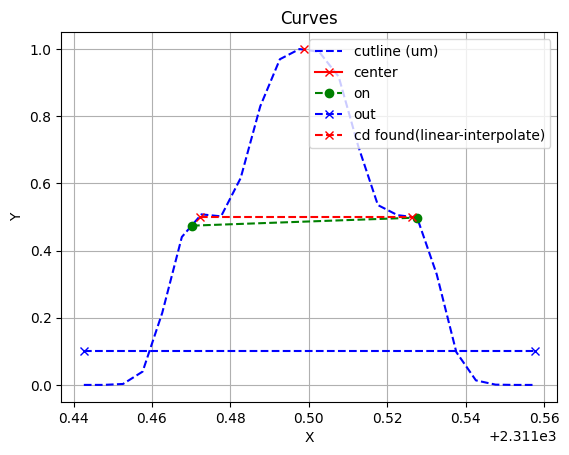

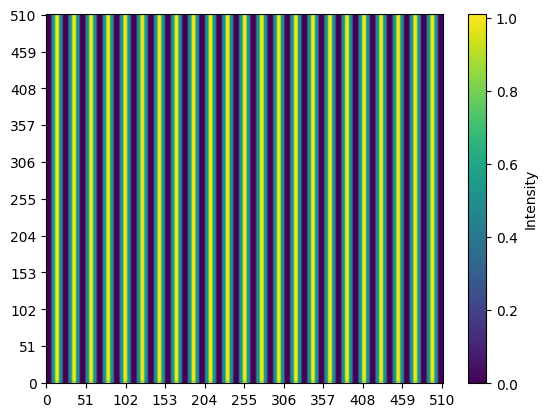

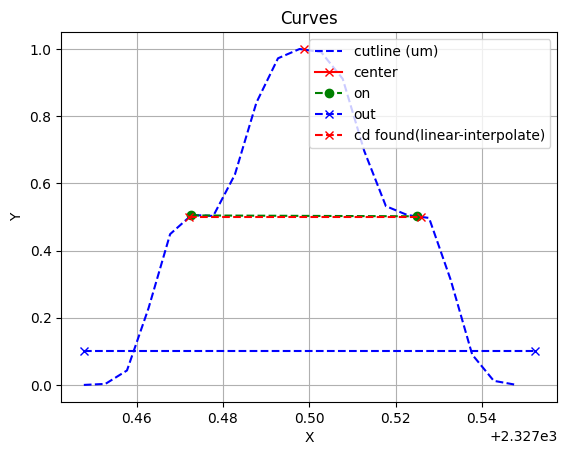

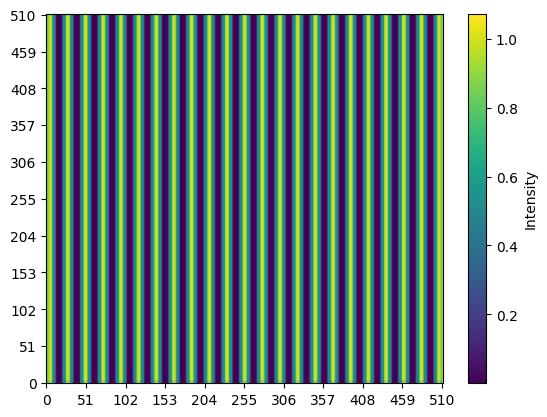

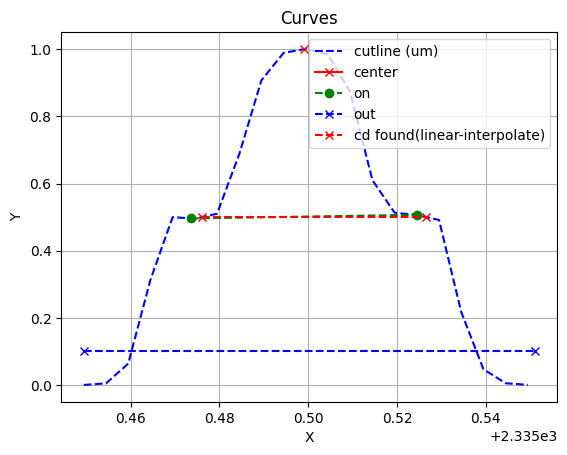

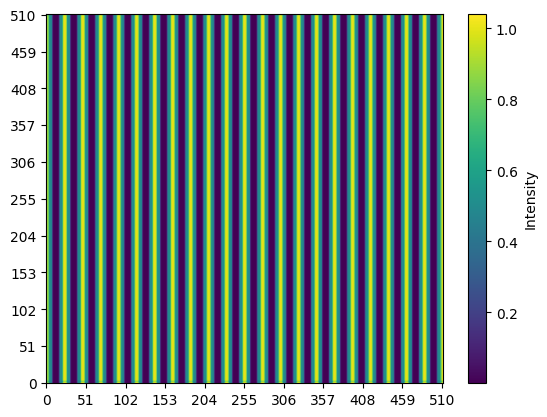

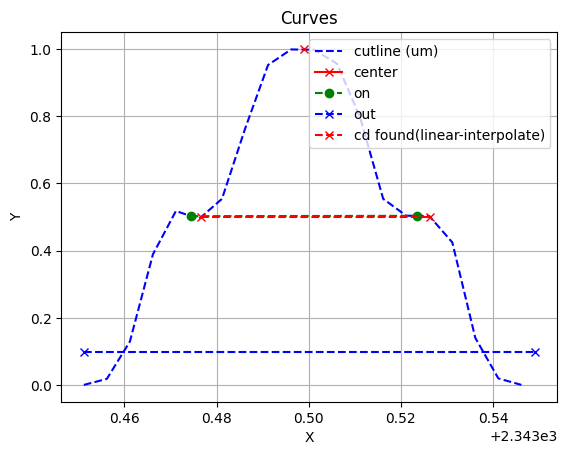

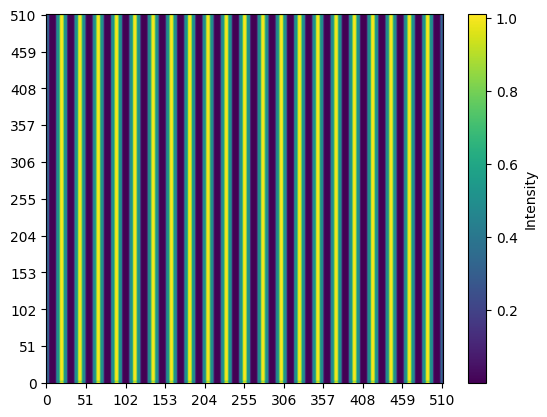

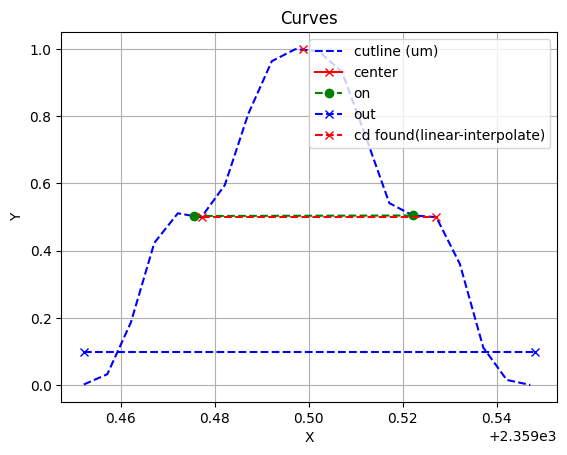

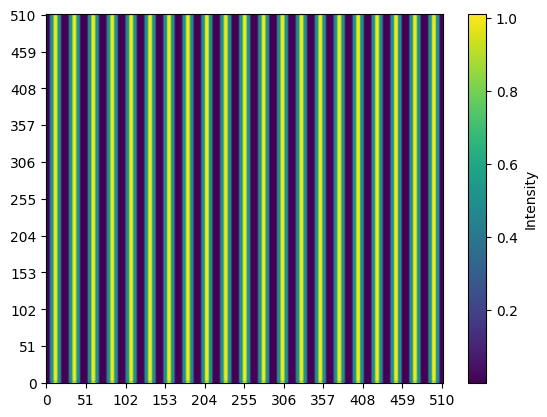

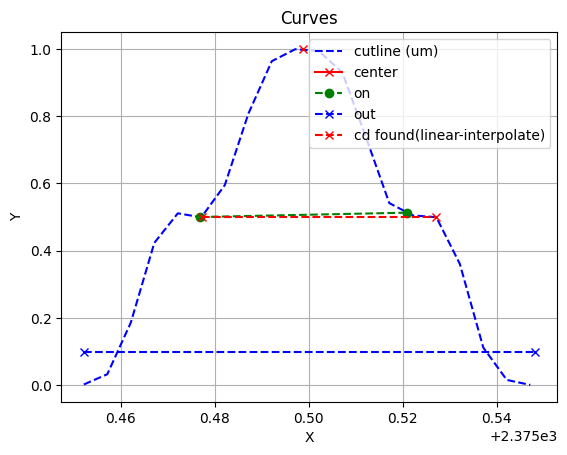

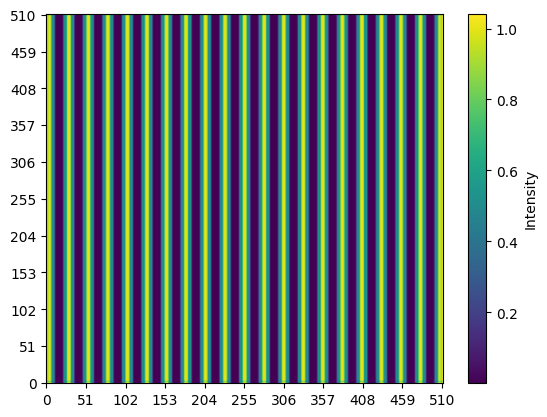

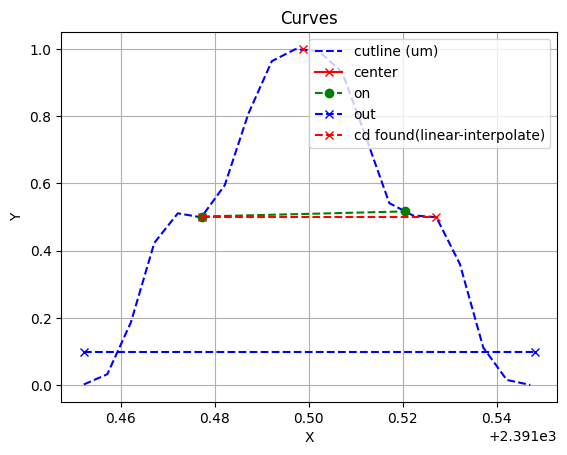

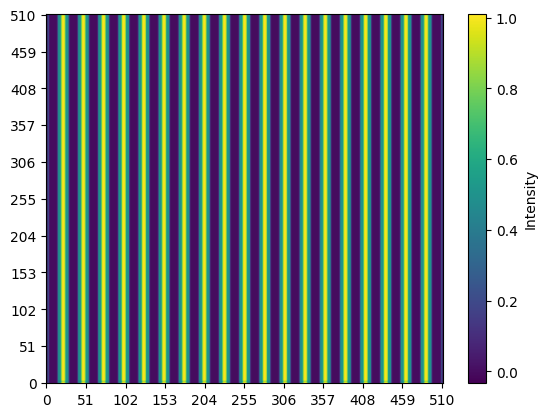

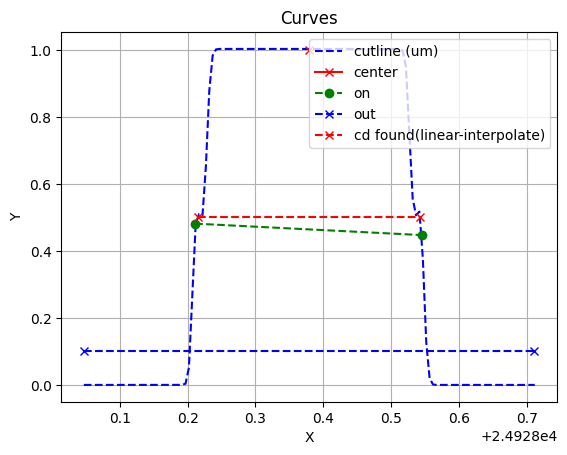

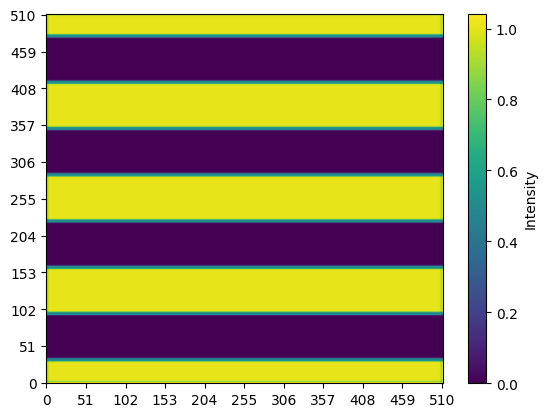

In [17]:

s.gather_cutline_and_features(False)

pattern-name  cutline(dbu)                               polar  design-cd(dbu)  measured-cd(dbu)  weight  post-calib-results  
-------------------------------------------------------------------------------------------------------------------------------------
L48P110       [[9245770,87078000],[9246230,87078000]]    1      192             230               1       [216.727,-3.31828]  
L48P114       [[9309791,87078000],[9310209,87078000]]    1      192             209               0.3     [215.064,1.51596]   
L48P116       [[9341797,87078000],[9342203,87078000]]    1      192             203               0.3     [202.28,-0.180041]  
L48P118       [[9373804,87078000],[9374196,87078000]]    1      192             196               0.3     [199.083,0.770792]  
L48P122       [[9437808,87078000],[9438192,87078000]]    1      192             187               0.3     [199.081,3.02018]   
L48P126       [[9501808,87078000],[9502192,87078000]]    1      192             177               0.3   

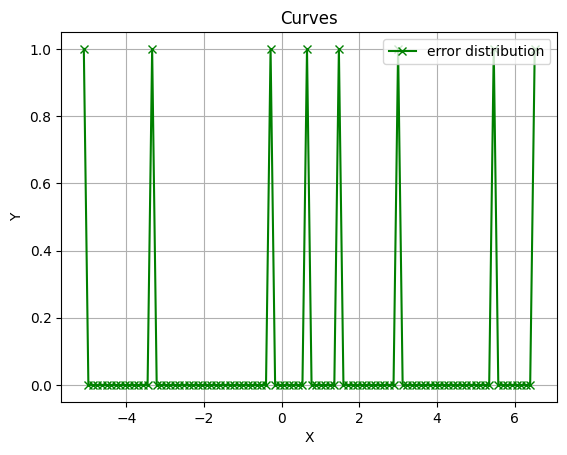

In [18]:

s.calib_optical_threshold(True)